# Introduction to Python for Data Science Final Project 4: Clustering

## Introduction

### Team Member:
1. Qaris Ardian Pratama

### Abstract

Kartu kredit merupakan alat pembayaran berupa kartu seperti kartu debit. Akan tetapi, cara kerja kartu kredit adalah pembayaran dalam suatu transaksi akan ditanggung oleh penerbit kartu terlebih dahulu. Dalam jangka waktu yang sudah disepakati, pemilik atau pemegang kartu kredit wajib melunasinya.

Dataset ini akan digunakan untuk membuat segmentasi pelanggan yang nantinya digunakan untuk strategi marketing. Rentang waktu pada dataset adalah 6 bulan dengan sekitar 9000 data. Clustering merupakan kegiatan mengelompokkan objek sehingga setiap kumpulan objek memiliki suatu kesamaan.

### Data

Dataset dengan judul **Credit Card Dataset for Clustering** memiliki 18 feature yang berhubungan dengan sifat pengguna sebagai berikut.

* CUSTID: Identification of Credit Cardholder (Categorical)
* BALANCE: Balance amount left in their account to make purchases
* BALANCEFREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
* PURCHASES: Amount of purchases made from the account
* ONEOFFPURCHASES: Maximum purchase amount did in one-go
* INSTALLMENTSPURCHASES: Amount of purchase done in installment
* CASH ADVANCE: Cash in advance given by the user
* PURCHASESFREQUENCY: How frequently the Purchases are being made score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
* ONEOFFPURCHASESFREQUENCY: How frequently Purchases are happening in one go (1 = frequently purchased, 0 = not frequently purchased)
* PURCHASESINSTALLMENTSFREQUENCY: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
* CASHADVANCEFREQUENCY: How frequently is the cash in advance being paid
* CASHADVANCETRX: Number of Transactions made with "Cash in Advanced"
* PURCHASESTRX: Number of purchase transactions made
* CREDIT LIMIT: Limit of Credit Card for user
* PAYMENTS: Amount of Payment done by the user
* MINIMUM_PAYMENTS: Minimum amount of payments made by the user
* PRCFULLPAYMENT: Percent of full payment paid by the user
* TENURE: Tenure of credit card service for user

### Objective
Tujuan dari analisis ini adalah sebagai berikut.
1. Mampu memahami konsep Clustering dengan menggunakan Scikit-learn.
2. Mampu mempersiapkan data untuk digunakan dalam Clustering.
3. Mampu mengimplementasikan Clustering pada data yang diberikan.

## Import Libraries

In [257]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import missingno

from sklearn.preprocessing import StandardScaler, normalize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import silhouette_score
from sklearn.metrics.pairwise import cosine_similarity
from pylab import bone, pcolor, colorbar, plot, show
# K-Means Clusterinng
from sklearn.cluster import KMeans
# DBScan Clustering
from sklearn.cluster import DBSCAN
# Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
# Visualization Hierarchy diagram
import scipy.cluster.hierarchy as shc
#DBSCAN
from sklearn.cluster import DBSCAN
from yellowbrick.cluster import KElbowVisualizer

import pickle

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

## Data Loading

In [258]:
df = pd.read_csv('../../../../data_set/CC GENERAL.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [259]:
print(f'Shape dari dataset adalah: {df.shape}')

Shape dari dataset adalah: (8950, 18)


In [260]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

**Keterangan**
<br>
Dapat dilihat pada kolom Non-Null Count bahwa terdapat missing values

In [261]:
missing_value = pd.DataFrame({"Missing_Value":df.isna().sum(), "Percent":df.apply(lambda x: f'{((x.isnull().sum()/df.shape[0])*100).round(2)} %')})
missing_value

,Missing_Value,Percent
CUST_ID,0,0.0 %
BALANCE,0,0.0 %
BALANCE_FREQUENCY,0,0.0 %
PURCHASES,0,0.0 %
ONEOFF_PURCHASES,0,0.0 %
INSTALLMENTS_PURCHASES,0,0.0 %
CASH_ADVANCE,0,0.0 %
PURCHASES_FREQUENCY,0,0.0 %
ONEOFF_PURCHASES_FREQUENCY,0,0.0 %
PURCHASES_INSTALLMENTS_FREQUENCY,0,0.0 %


<AxesSubplot:>

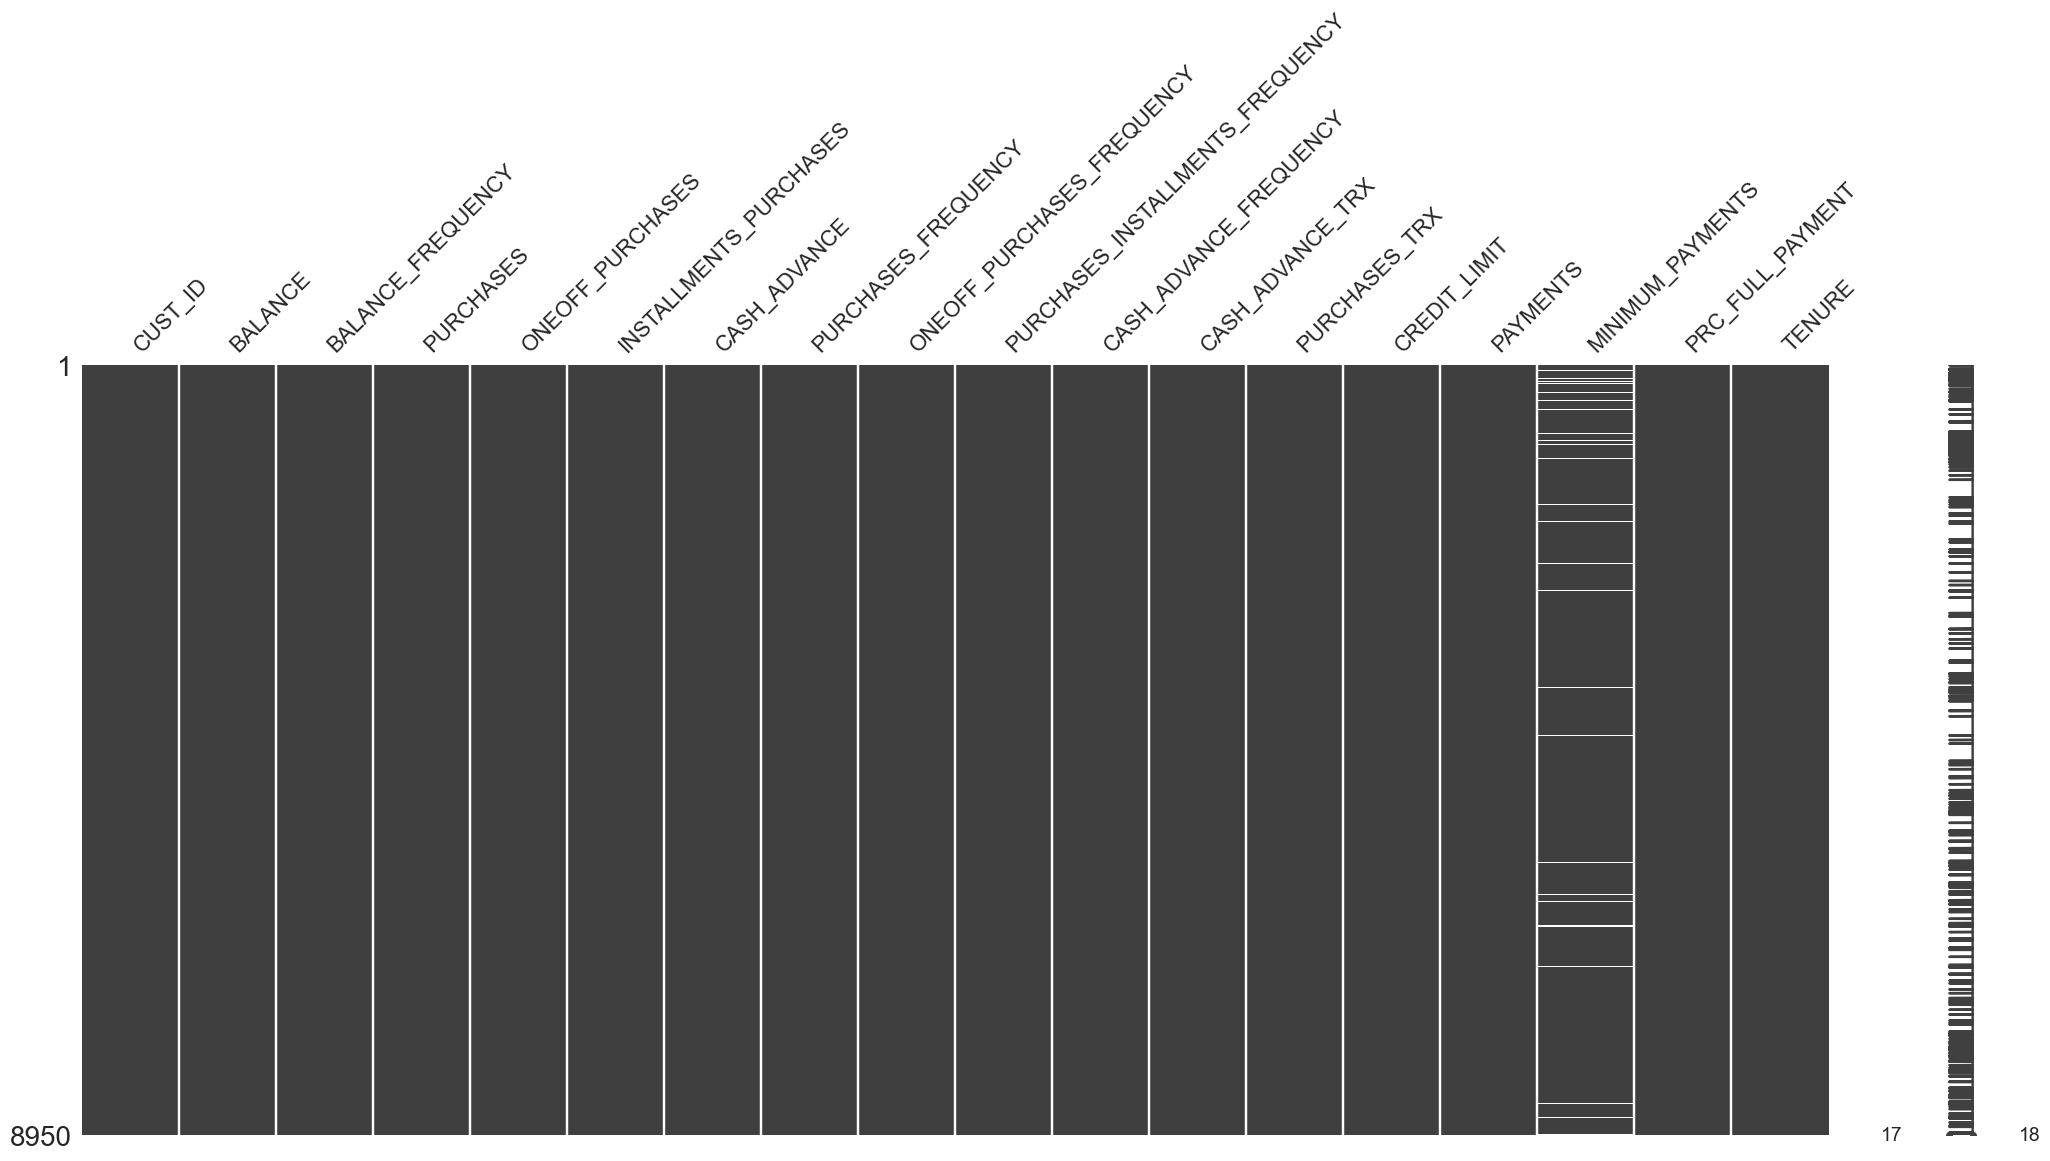

In [262]:
missingno.matrix(df)

<AxesSubplot:>

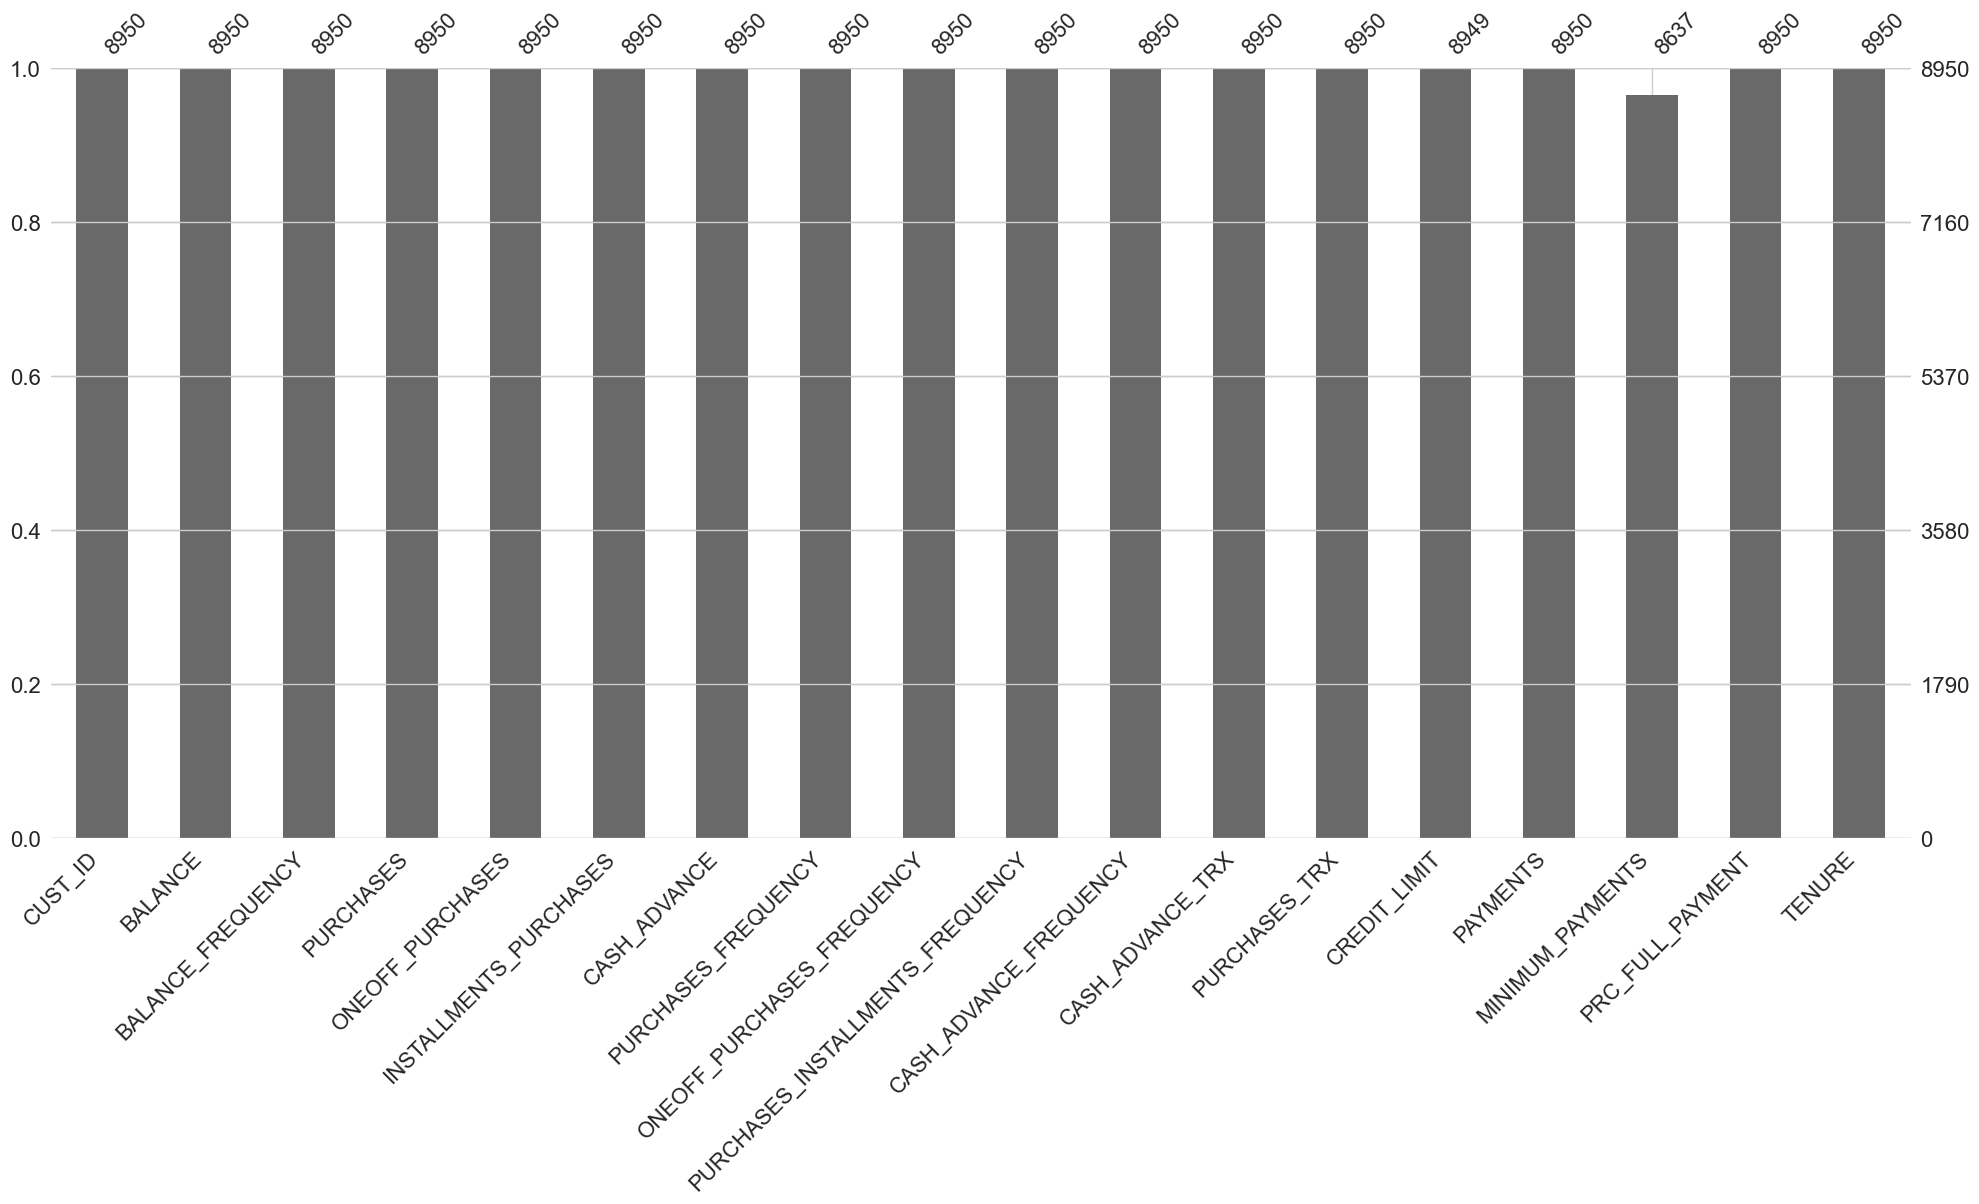

In [263]:
missingno.bar(df)

## Data Cleaning

### Handling Missing Values

In [264]:
df_clean = df.copy(deep=True)

In [265]:
df_clean['MINIMUM_PAYMENTS'] = df_clean['MINIMUM_PAYMENTS'].fillna(df_clean['MINIMUM_PAYMENTS'].mean())
df_clean['CREDIT_LIMIT'] = df_clean['CREDIT_LIMIT'].fillna(df_clean['CREDIT_LIMIT'].mean())

In [266]:
missing_value = pd.DataFrame({"Missing_Value":df_clean.isna().sum(), "Percent":df_clean.apply(lambda x: f'{((x.isnull().sum()/df_clean.shape[0])*100).round(2)} %')})
missing_value

,Missing_Value,Percent
CUST_ID,0,0.0 %
BALANCE,0,0.0 %
BALANCE_FREQUENCY,0,0.0 %
PURCHASES,0,0.0 %
ONEOFF_PURCHASES,0,0.0 %
INSTALLMENTS_PURCHASES,0,0.0 %
CASH_ADVANCE,0,0.0 %
PURCHASES_FREQUENCY,0,0.0 %
ONEOFF_PURCHASES_FREQUENCY,0,0.0 %
PURCHASES_INSTALLMENTS_FREQUENCY,0,0.0 %


In [267]:
df_clean['CUST_ID'].value_counts().sum()

8950

**Keterangan**
<br>
Feature CUST_ID tidak akan berguna karena setiap baris data memiliki id-nya sendiri

In [268]:
df_clean.drop(['CUST_ID'], axis=1, inplace=True)
df_clean.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


## EDA and Visualization

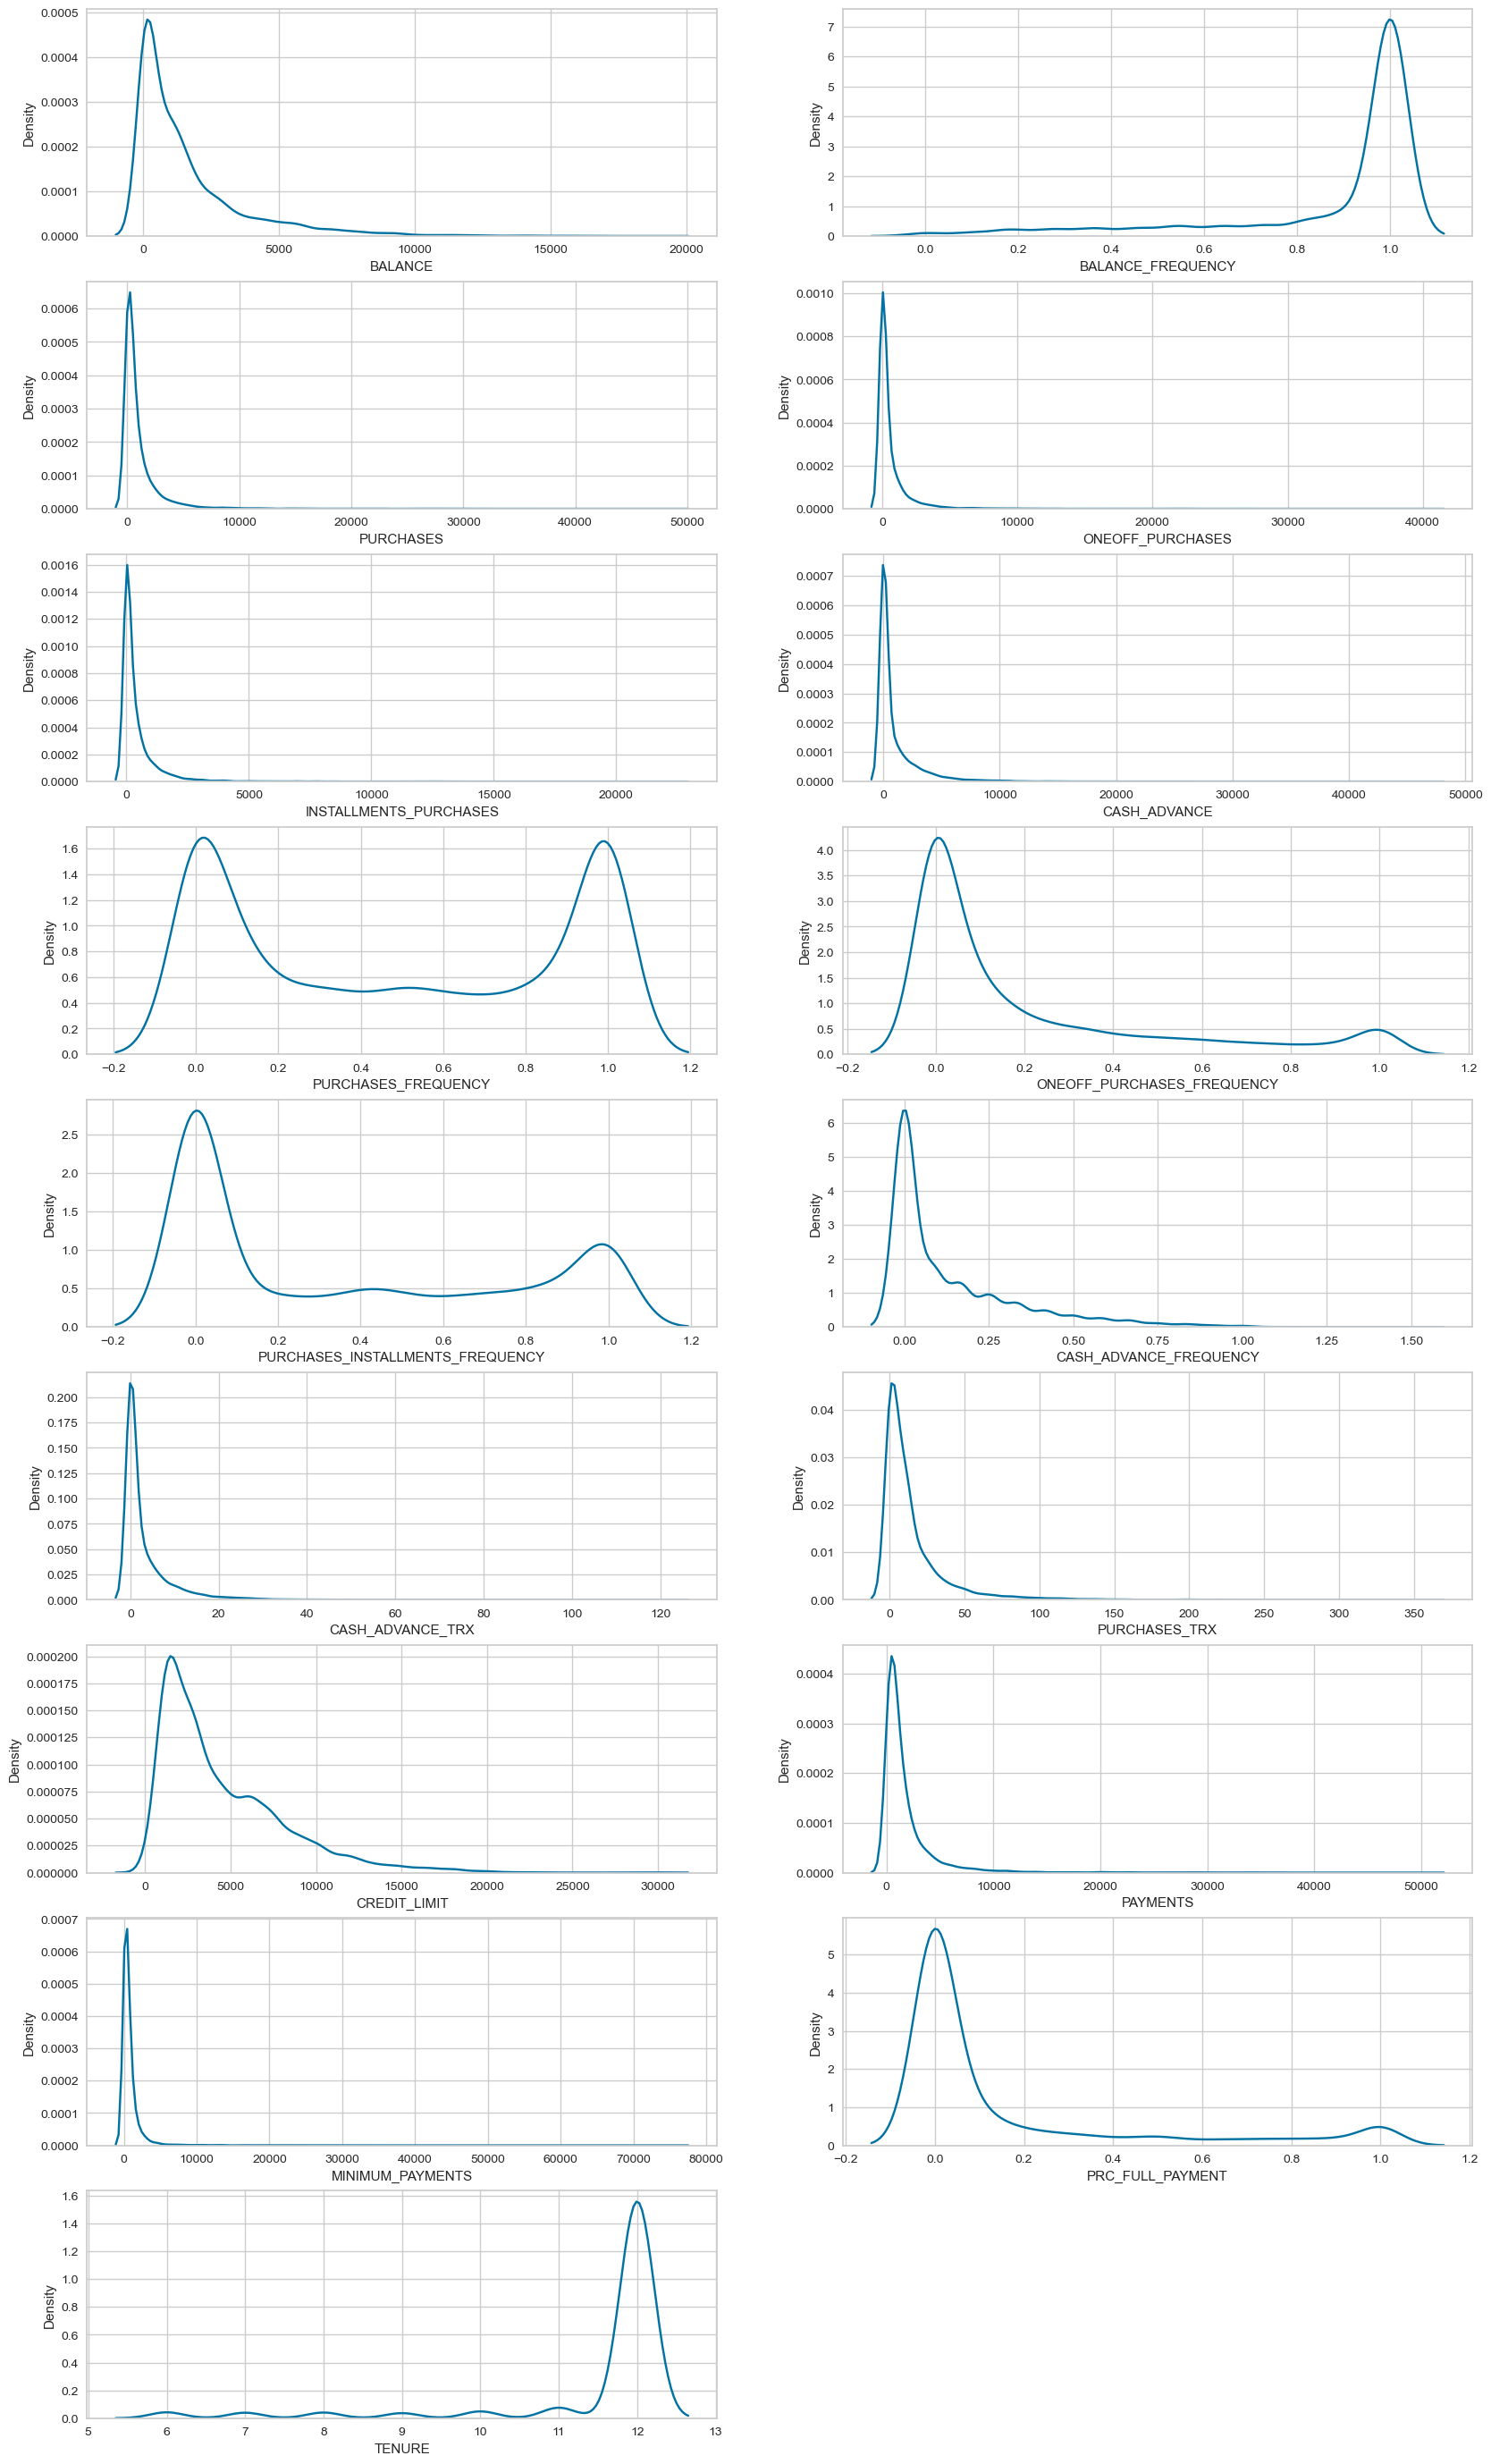

In [269]:
plt.figure(figsize=(20,35))
for i, col in enumerate(df_clean.columns):
    if df_clean[col].dtype != 'object':
        ax = plt.subplot(9, 2, i+1)
        sns.kdeplot(df_clean[col], ax=ax)
        plt.xlabel(col)
        
plt.show()

**Keterangan**
<br>
Skewness atau kemiringan sangat bervariasi. Untuk memudahkan model membentuk cluster yang lebih baik, skewness ini perlu sedikit diperbaiki.

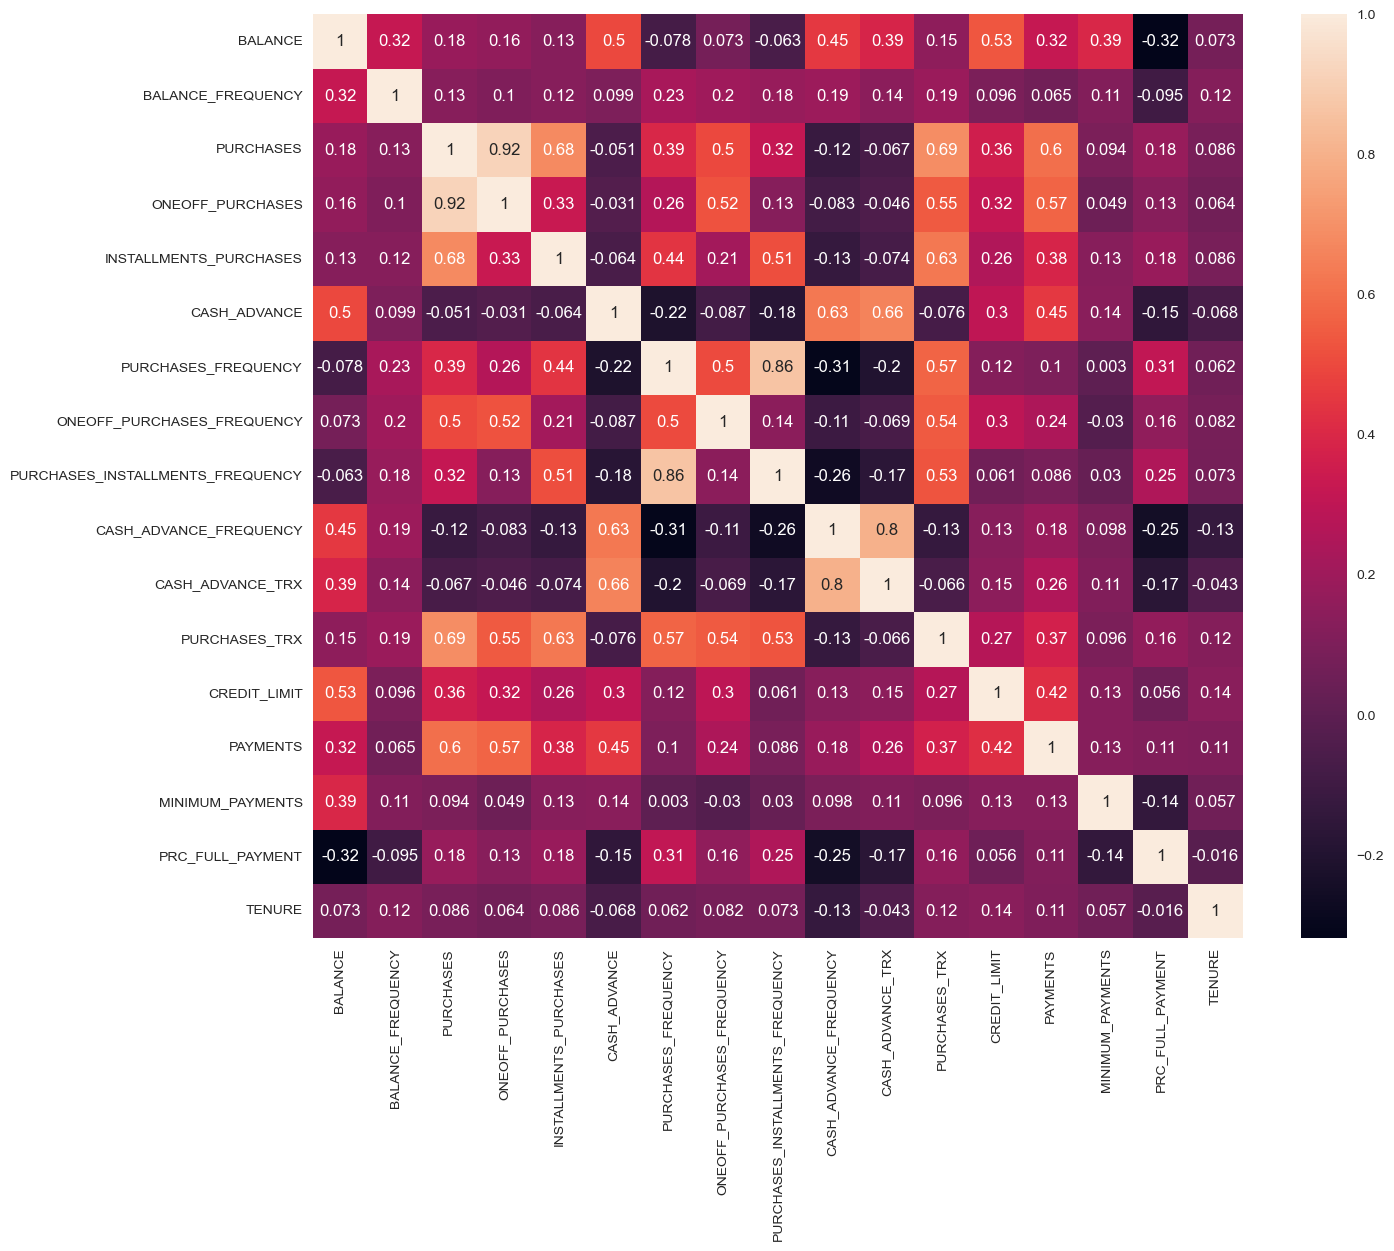

In [270]:
plt.figure(figsize=(15,12))
sns.heatmap(df_clean.corr(), annot=True)
plt.show()

## Data Preprocessing

In [271]:
df_deploy = df_clean.copy()
df_uji = df_clean.copy()
df_copy = df_clean.copy()
df_copy2= df_clean.copy()

### Scaling Data

In [272]:
a = [i for i in df_copy.columns]

In [273]:
standard_scaler = StandardScaler()
df_copy[a] = standard_scaler.fit_transform(df_copy[a])
df_copy.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960433,-0.528979,-3.109675e-01,-0.525551,0.36068
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688639,0.818642,8.931021e-02,0.234227,0.36068
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826062,-0.383805,-1.016632e-01,-0.525551,0.36068
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826062,-0.598688,-4.390474e-16,-0.525551,0.36068
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905464,-0.364368,-2.657913e-01,-0.525551,0.36068


### Normalizing the Data

In [274]:
df_copy = normalize(df_copy) 

In [275]:
df_copy = pd.DataFrame(df_copy) 

In [276]:
df_copy.rename(columns={
    0:'BALANCE',
    1:'BALANCE_FREQUENCY',
    2:'PURCHASES',
    3:'ONEOFF_PURCHASES',
    4:'INSTALLMENTS_PURCHASES',
    5:'CASH_ADVANCE',
    6:'PURCHASES_FREQUENCY',
    7:'ONEOFF_PURCHASES_FREQUENCY',
    8:'PURCHASES_INSTALLMENTS_FREQUENCY',
    9:'CASH_ADVANCE_FREQUENCY',
    10:'CASH_ADVANCE_TRX',
    11:'PURCHASES_TRX',
    12:'CREDIT_LIMIT',
    13:'PAYMENTS',
    14:'MINIMUM_PAYMENTS',
    15:'PRC_FULL_PAYMENT',
    16:'TENURE',
    17:'CLUSTERS'
}, inplace=True)

In [277]:
df_copy.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.311938,-0.106297,-0.181072,-0.152108,-0.148760,-0.198921,-0.343687,-0.289212,-0.301422,-0.287801,-0.202878,-0.217905,-0.409290,-0.225425,-1.325192e-01,-0.223964,0.153704
1,0.219925,0.037539,-0.131222,-0.099749,-0.127037,0.728166,-0.341434,-0.189660,-0.256265,0.160401,0.030761,-0.165384,0.192448,0.228779,2.495877e-02,0.065457,0.100796
2,0.126682,0.146783,-0.030504,0.030850,-0.128790,-0.132249,0.359771,0.757440,-0.259802,-0.191339,-0.134880,-0.030888,0.234039,-0.108739,-2.880315e-02,-0.148899,0.102187
3,0.020589,-0.426439,0.097309,0.229034,-0.190618,-0.154587,-0.425253,-0.167447,-0.384524,-0.108570,-0.138184,-0.231288,0.346393,-0.251048,-1.841058e-16,-0.220379,0.151244
4,-0.151595,0.218909,-0.195238,-0.146744,-0.192075,-0.197234,-0.428504,-0.168727,-0.387463,-0.285359,-0.201157,-0.233056,-0.382591,-0.153959,-1.123064e-01,-0.222064,0.152400


### Reducing Dimensions

In [278]:
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(df_copy) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 
  
X_principal.head()

,P1,P2
0,-0.489825,-0.679678
1,-0.518791,0.545011
2,0.330885,0.268977
3,-0.482373,-0.092110
4,-0.563289,-0.481915


# PERCOBAAN

## Model Definition

### KMeans

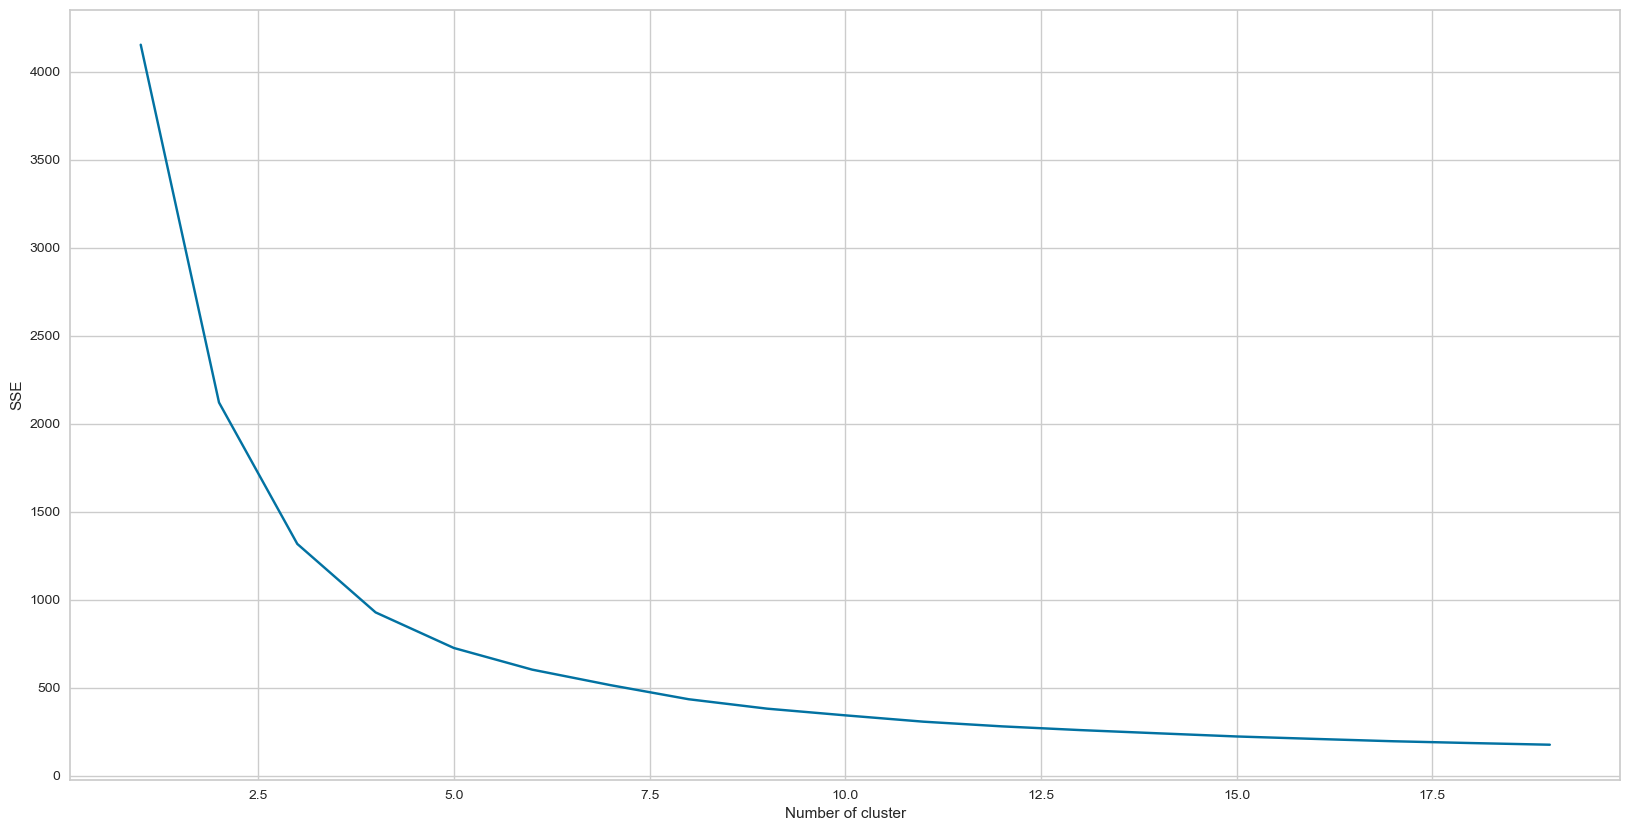

In [279]:
sse = {}
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, max_iter=300, init='k-means++', random_state=40).fit(X_principal)
    sse[k] = kmeans.inertia_

plt.figure(figsize=(20, 10))
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

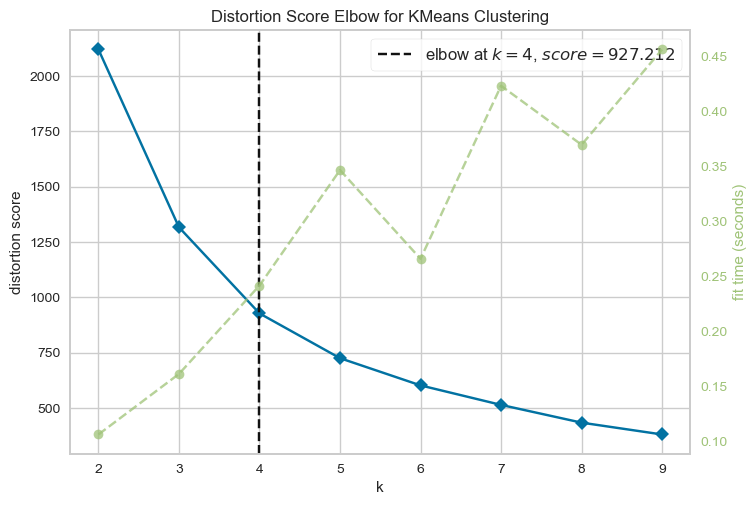

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [280]:
sse = {}
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, max_iter=500, init='k-means++', random_state=25).fit(X_principal)
    distortion_visualizer = KElbowVisualizer(kmeans, k=(2,10))
    sse[k] = kmeans.inertia_

distortion_visualizer.fit(X_principal)       
distortion_visualizer.show()

In [281]:
kmeans = KMeans(n_clusters = 4,init ='k-means++', max_iter=300,random_state=35)
model1 = kmeans.fit(df_copy)
y_pred = kmeans.predict(df_copy)

In [282]:
clus_df = pd.DataFrame(df_copy,columns = df_copy.columns)
clus_df['CLUSTERS'] = y_pred
clus_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTERS
0,-0.311938,-0.106297,-0.181072,-0.152108,-0.148760,-0.198921,-0.343687,-0.289212,-0.301422,-0.287801,-0.202878,-0.217905,-0.409290,-0.225425,-1.325192e-01,-0.223964,0.153704,0
1,0.219925,0.037539,-0.131222,-0.099749,-0.127037,0.728166,-0.341434,-0.189660,-0.256265,0.160401,0.030761,-0.165384,0.192448,0.228779,2.495877e-02,0.065457,0.100796,2
2,0.126682,0.146783,-0.030504,0.030850,-0.128790,-0.132249,0.359771,0.757440,-0.259802,-0.191339,-0.134880,-0.030888,0.234039,-0.108739,-2.880315e-02,-0.148899,0.102187,1
3,0.020589,-0.426439,0.097309,0.229034,-0.190618,-0.154587,-0.425253,-0.167447,-0.384524,-0.108570,-0.138184,-0.231288,0.346393,-0.251048,-1.841058e-16,-0.220379,0.151244,0
4,-0.151595,0.218909,-0.195238,-0.146744,-0.192075,-0.197234,-0.428504,-0.168727,-0.387463,-0.285359,-0.201157,-0.233056,-0.382591,-0.153959,-1.123064e-01,-0.222064,0.152400,0


In [283]:
clus_df['CLUSTERS'].value_counts()

0    2907
3    2190
2    1950
1    1903
Name: CLUSTERS, dtype: int64

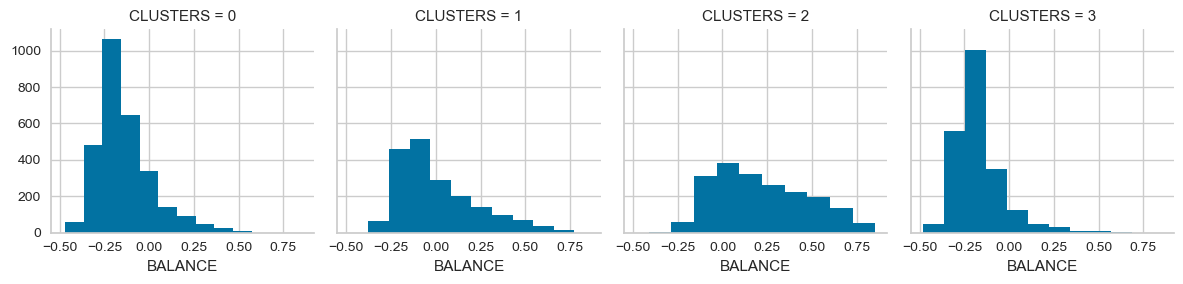

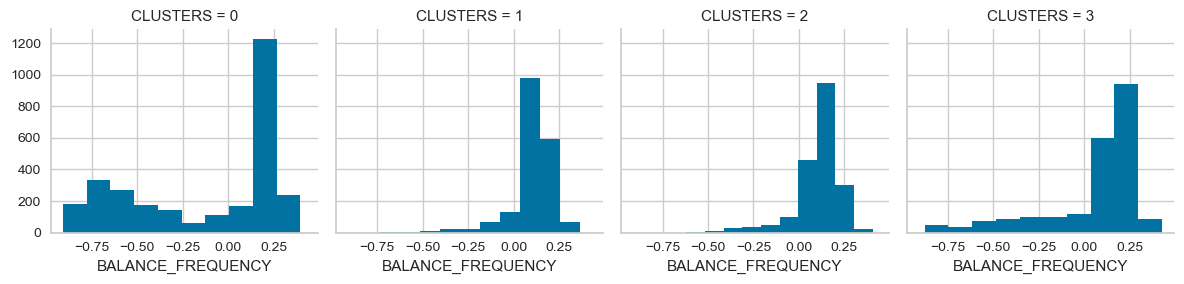

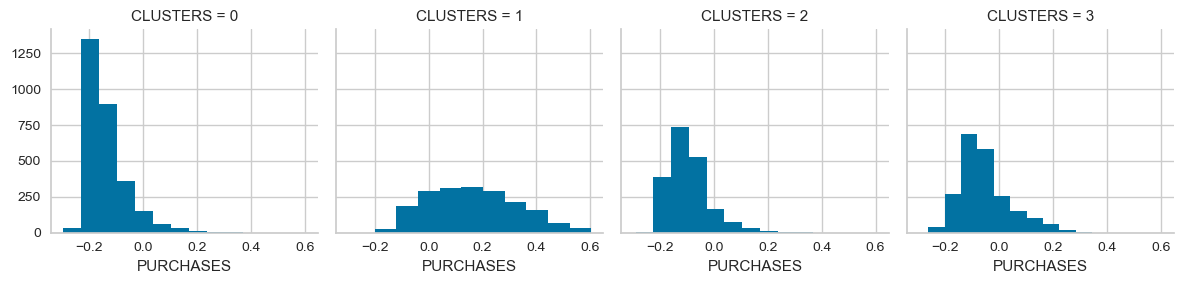

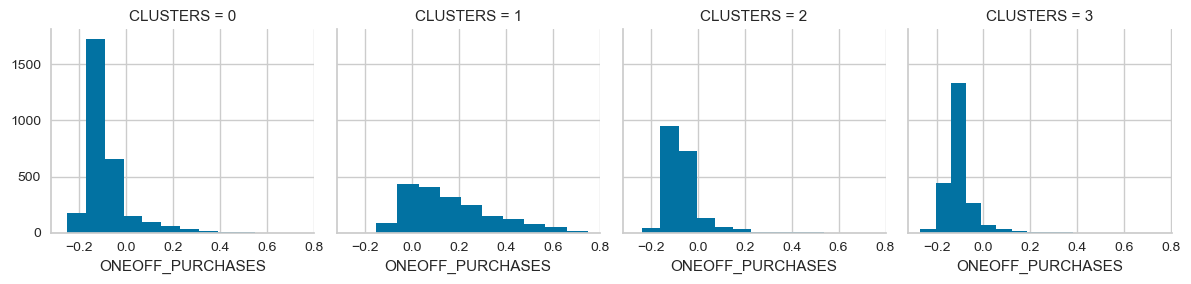

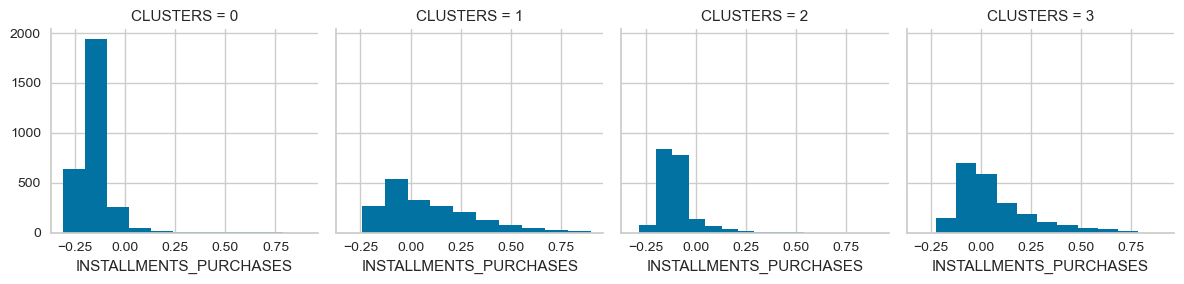

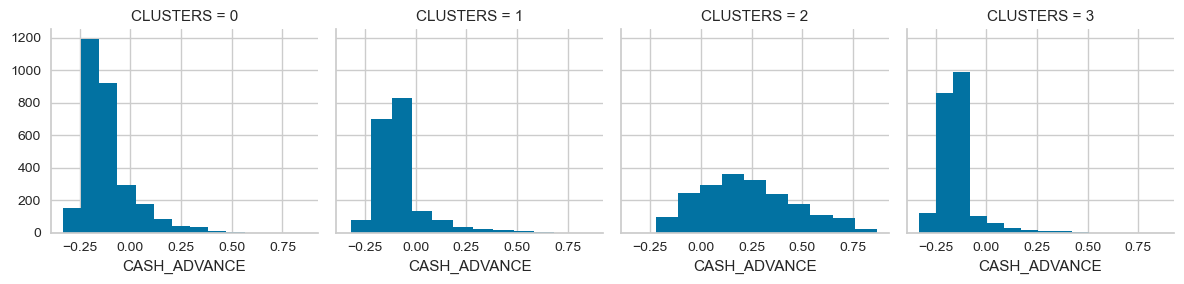

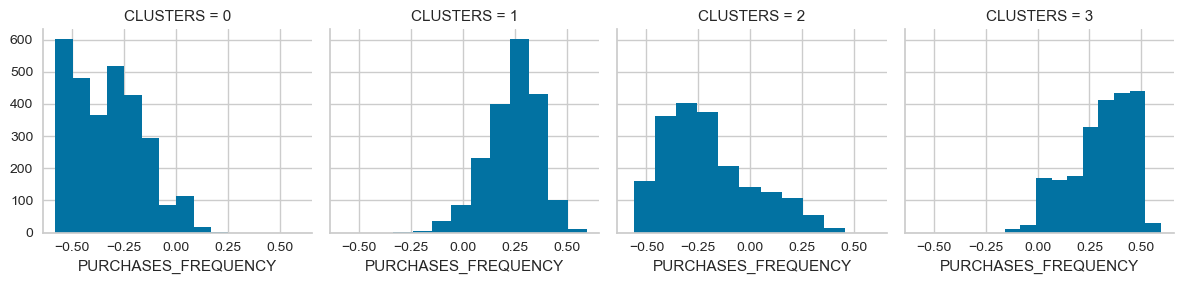

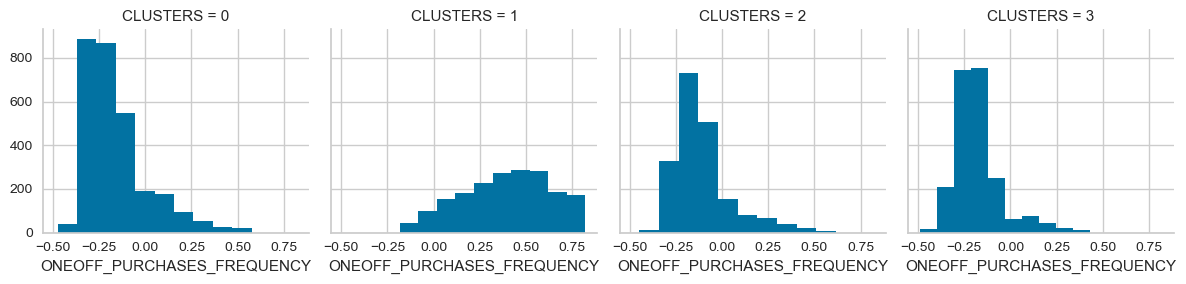

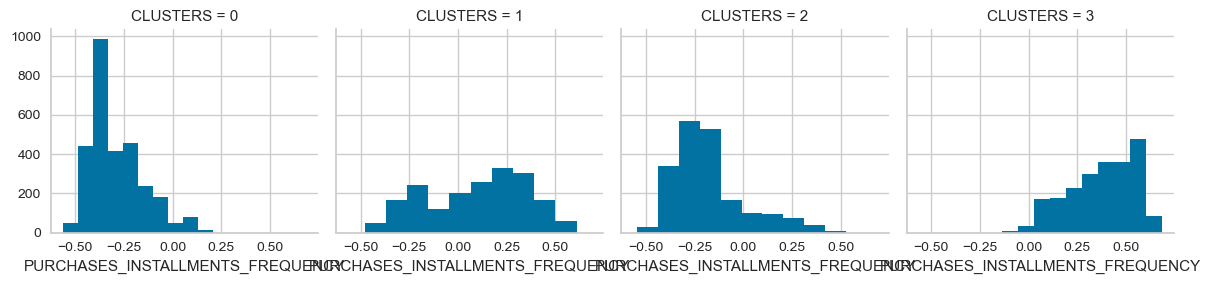

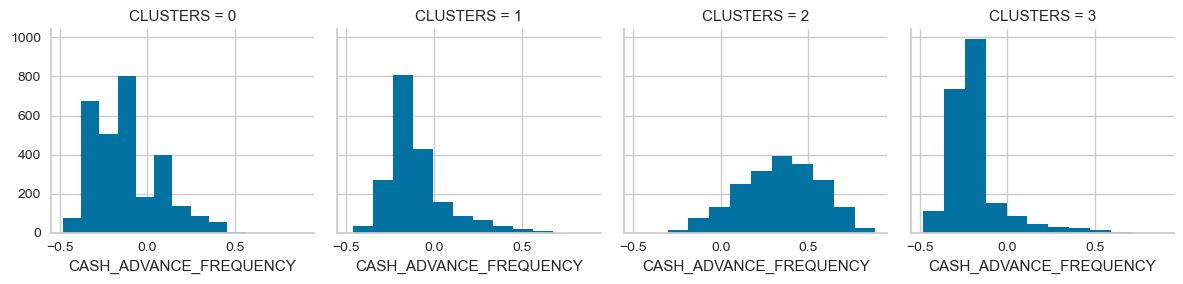

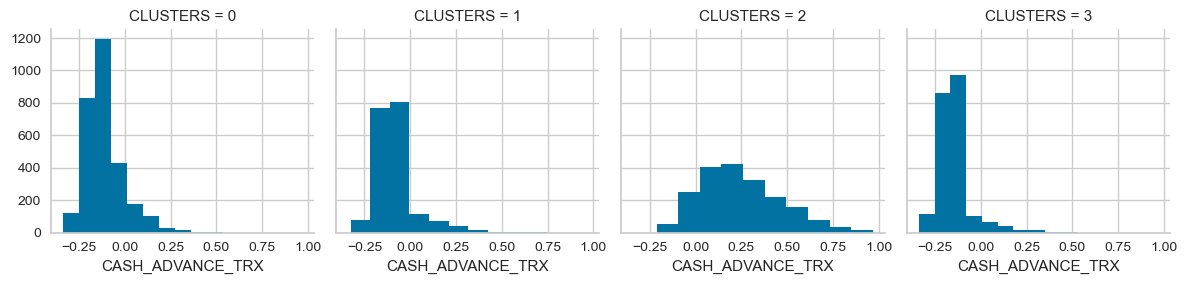

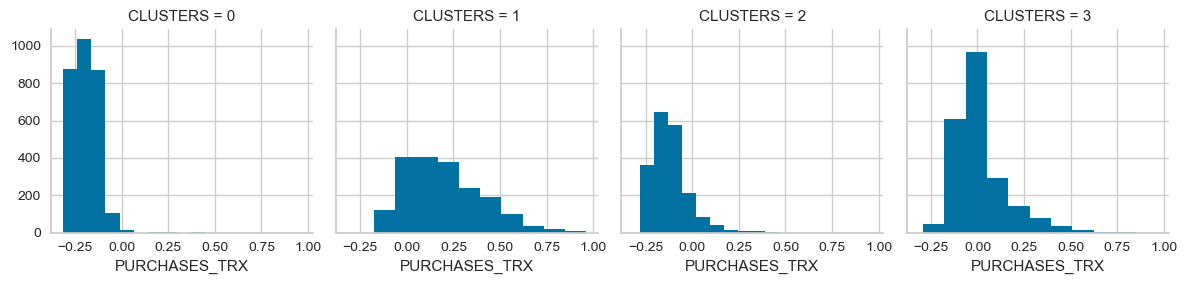

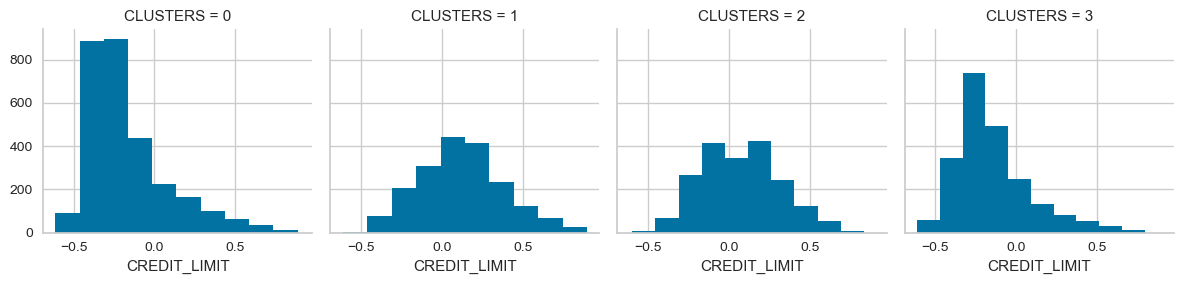

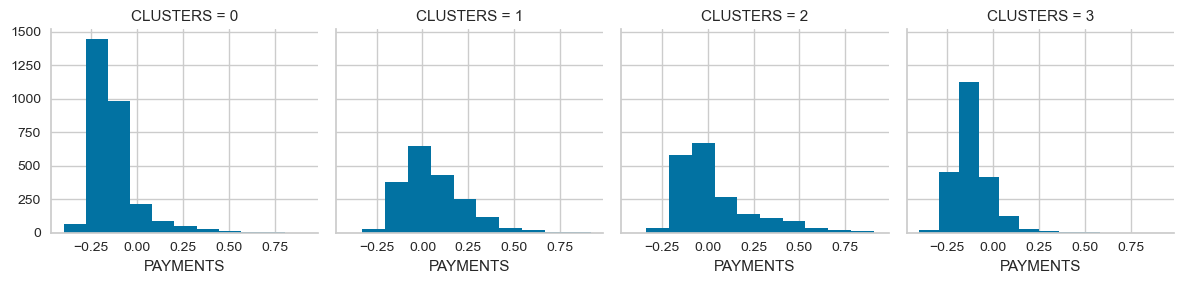

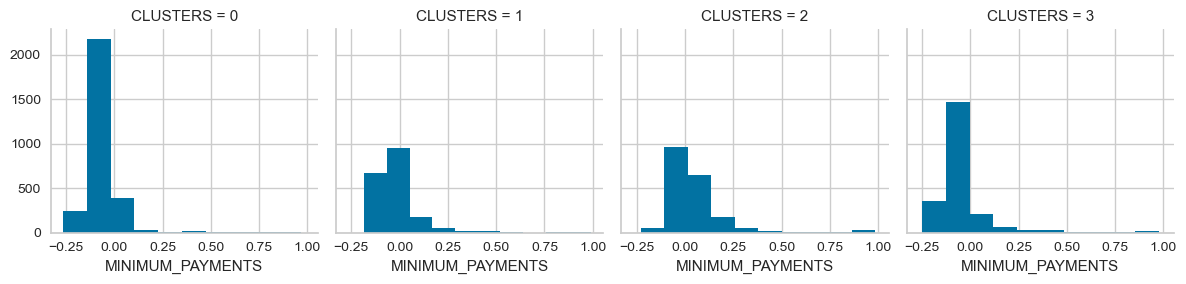

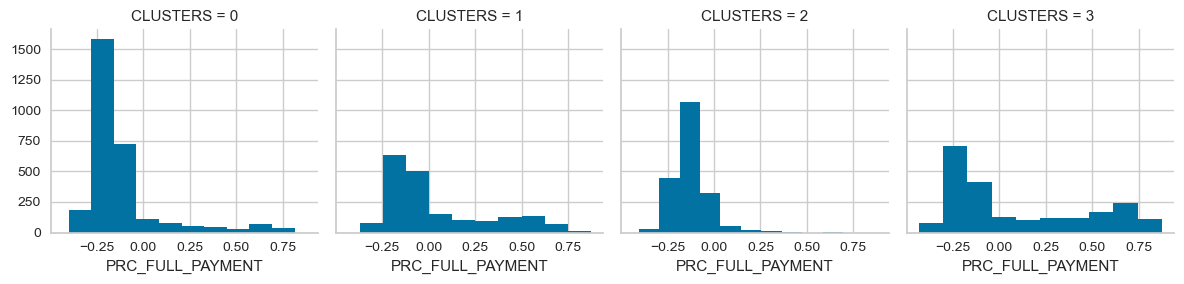

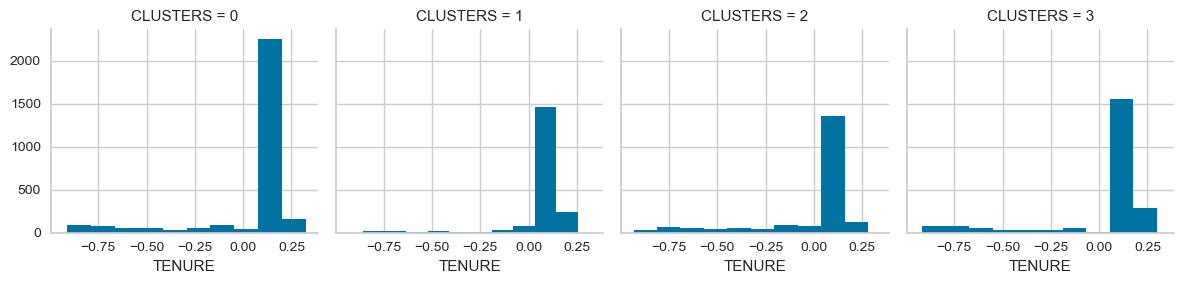

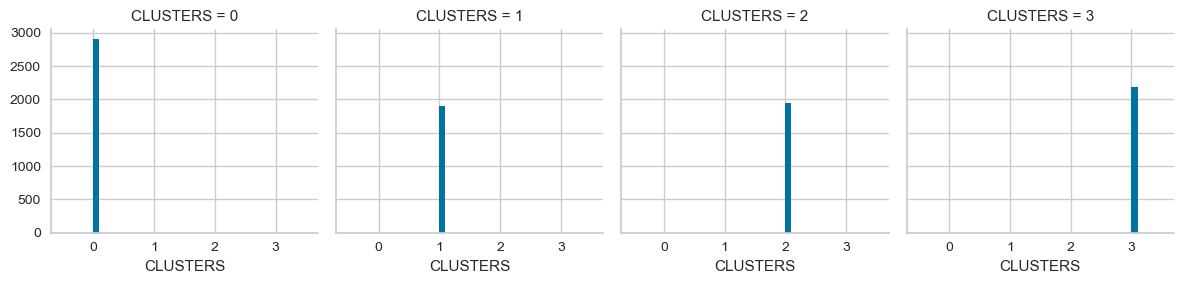

In [284]:
for c in clus_df:
    grid= sns.FacetGrid(clus_df, col='CLUSTERS')
    grid.map(plt.hist, c)

**Keterangan**
1. Cluster 0 merupakan nasabah dengan **frekuensi pembelian cukup tinggi**, **credit limit cukup tinggi**, **tenor tertinggi ke-2**, **nominal total pembelian tinggi**, **jumlah saldo cukup tinggi**
2. Cluster 1 merupakan nasabah dengan **frekuensi pembelian rendah**, **credit limit rendah**, **tenor paling tinggi**, **nominal total pembelian rendah**, **jumlah saldo rata-rata**
3. Cluster 2 merupakan nasabah dengan **frekuensi pembelian tinggi**, **credit limit cukup rendah**, **tenor tertinggi ke-3**, **nominal total pembelian rata-rata**, **jumlah saldo rendah**
4. Cluster 3 merupakan nasabah dengan **frekuensi pembelian rata-rata**, **credit limit tinggi**, **tenor terendah**, **nominal total pembelian cukup rendah**, **jumlah saldo tinggi**

In [285]:
X = clus_df[['BALANCE','PURCHASES_FREQUENCY', 'CREDIT_LIMIT', 'TENURE','PRC_FULL_PAYMENT']].to_numpy()

In [286]:
km = KMeans(n_clusters = 4, init ='k-means++', max_iter=300, random_state=35)
model2=km.fit(X)
y_balance_pred = km.predict(X)

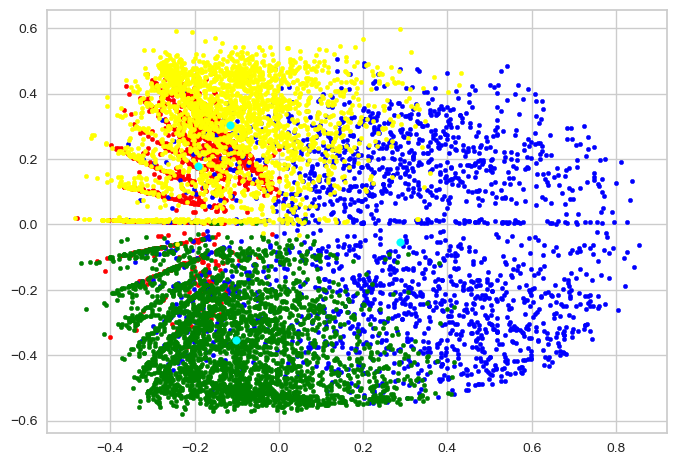

In [303]:
plt.scatter(X[y_balance_pred==0, 0], X[y_balance_pred==0, 1], s=10, c='red', label ='Cluster 1')
plt.scatter(X[y_balance_pred==1, 0], X[y_balance_pred==1, 1], s=10, c='blue', label ='Cluster 2')
plt.scatter(X[y_balance_pred==2, 0], X[y_balance_pred==2, 1], s=10, c='green', label ='Cluster 3')
plt.scatter(X[y_balance_pred==3, 0], X[y_balance_pred==3, 1], s=10, c='yellow', label ='Cluster 4')

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=30, c='cyan', label = 'Centroids')
plt.show()

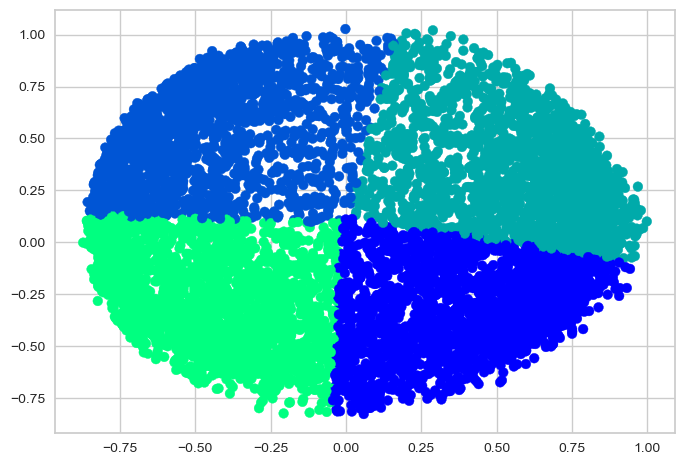

In [301]:
# Visualizing the clustering 
plt.scatter(X_principal['P1'], X_principal['P2'],  
           c = KMeans(n_clusters = 4, init ='k-means++', max_iter=300, random_state=35).fit_predict(X_principal), cmap =plt.cm.winter) 
plt.show() 

### Hierarchical Clustering

In [292]:
data_scaled = normalize(df_copy)
data_scaled = pd.DataFrame(data_scaled, columns=df_copy.columns)
data_scaled.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTERS
0,-0.311938,-0.106297,-0.181072,-0.152108,-0.148760,-0.198921,-0.343687,-0.289212,-0.301422,-0.287801,-0.202878,-0.217905,-0.409290,-0.225425,-1.325192e-01,-0.223964,0.153704,0.000000
1,0.098354,0.016788,-0.058684,-0.044609,-0.056812,0.325646,-0.152694,-0.084818,-0.114605,0.071733,0.013757,-0.073962,0.086065,0.102313,1.116190e-02,0.029273,0.045077,0.894427
2,0.089578,0.103791,-0.021570,0.021814,-0.091068,-0.093514,0.254397,0.535591,-0.183708,-0.135297,-0.095374,-0.021841,0.165491,-0.076890,-2.036690e-02,-0.105287,0.072257,0.707107
3,0.020589,-0.426439,0.097309,0.229034,-0.190618,-0.154587,-0.425253,-0.167447,-0.384524,-0.108570,-0.138184,-0.231288,0.346393,-0.251048,-1.841058e-16,-0.220379,0.151244,0.000000
4,-0.151595,0.218909,-0.195238,-0.146744,-0.192075,-0.197234,-0.428504,-0.168727,-0.387463,-0.285359,-0.201157,-0.233056,-0.382591,-0.153959,-1.123064e-01,-0.222064,0.152400,0.000000


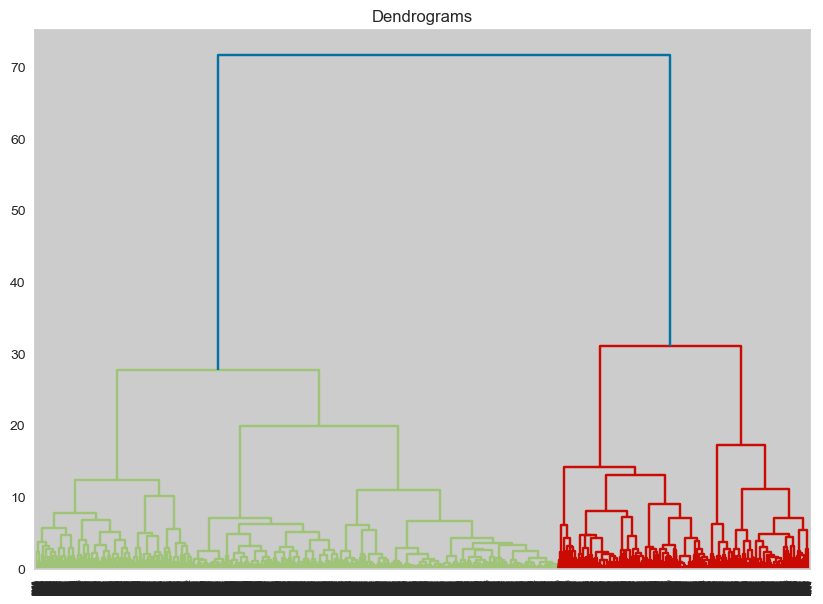

In [293]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

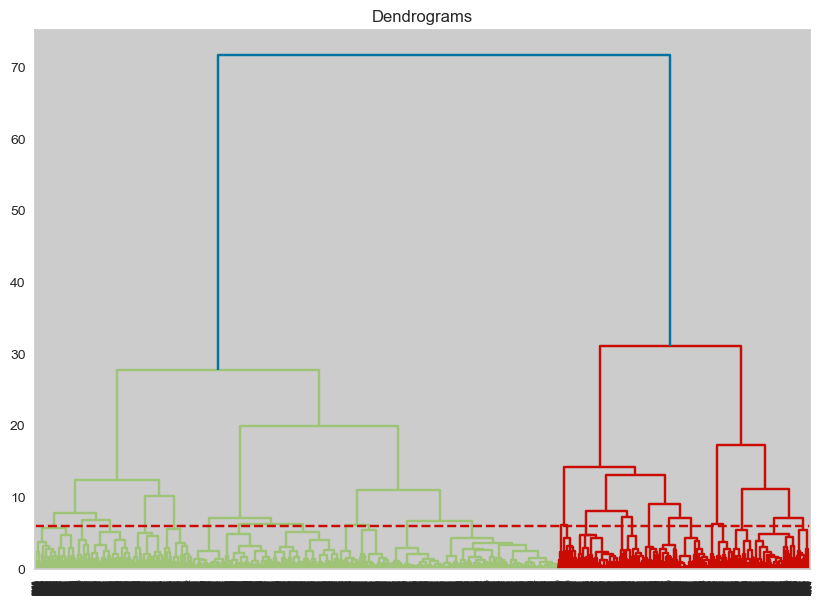

In [294]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=6, color='r', linestyle='--')

In [295]:
hier = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
model2 = hier.fit(data_scaled)
y_pred2 = hier.fit_predict(data_scaled)

In [296]:
hier_df = pd.DataFrame(df_copy,columns = df_copy.columns)
hier_df['CLUSTERS'] = y_pred2
hier_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTERS
0,-0.311938,-0.106297,-0.181072,-0.152108,-0.148760,-0.198921,-0.343687,-0.289212,-0.301422,-0.287801,-0.202878,-0.217905,-0.409290,-0.225425,-1.325192e-01,-0.223964,0.153704,0
1,0.219925,0.037539,-0.131222,-0.099749,-0.127037,0.728166,-0.341434,-0.189660,-0.256265,0.160401,0.030761,-0.165384,0.192448,0.228779,2.495877e-02,0.065457,0.100796,1
2,0.126682,0.146783,-0.030504,0.030850,-0.128790,-0.132249,0.359771,0.757440,-0.259802,-0.191339,-0.134880,-0.030888,0.234039,-0.108739,-2.880315e-02,-0.148899,0.102187,1
3,0.020589,-0.426439,0.097309,0.229034,-0.190618,-0.154587,-0.425253,-0.167447,-0.384524,-0.108570,-0.138184,-0.231288,0.346393,-0.251048,-1.841058e-16,-0.220379,0.151244,0
4,-0.151595,0.218909,-0.195238,-0.146744,-0.192075,-0.197234,-0.428504,-0.168727,-0.387463,-0.285359,-0.201157,-0.233056,-0.382591,-0.153959,-1.123064e-01,-0.222064,0.152400,0


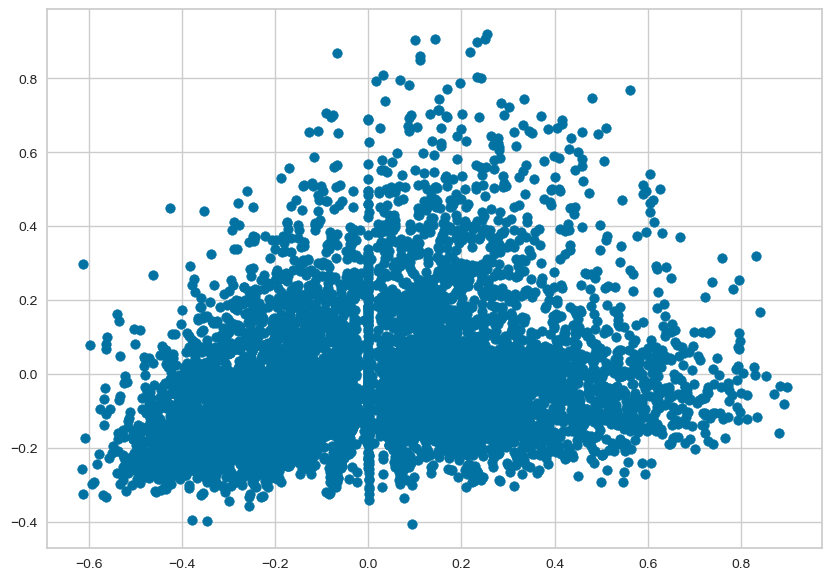

In [297]:
plt.figure(figsize=(10, 7))  
plt.scatter(hier_df['CREDIT_LIMIT'], hier_df['PAYMENTS'])

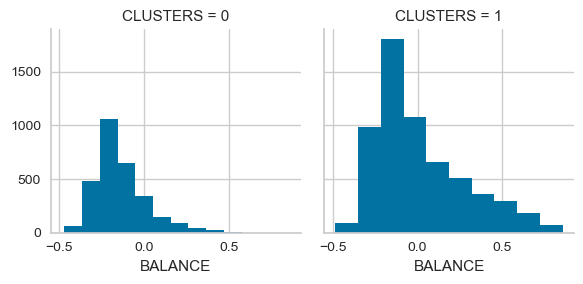

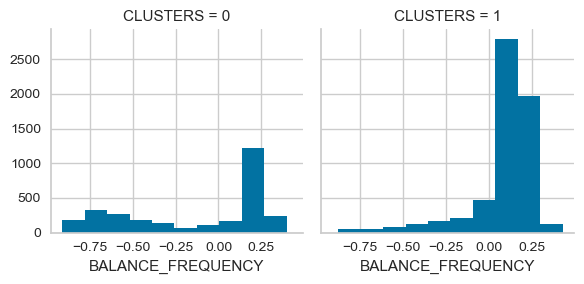

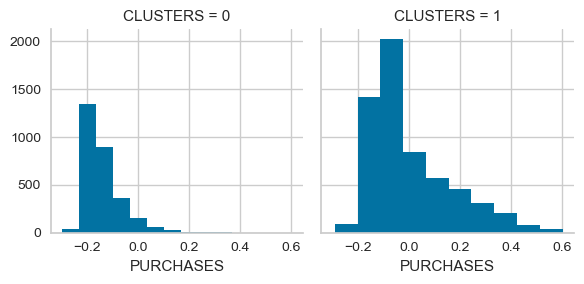

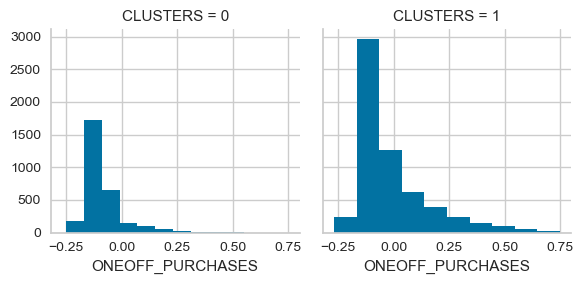

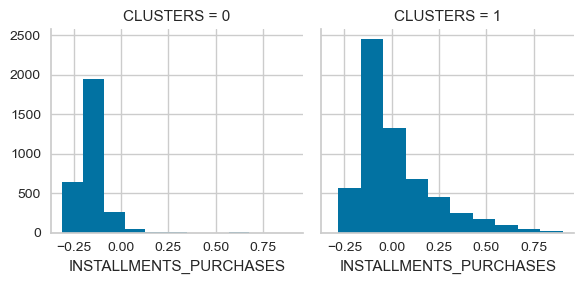

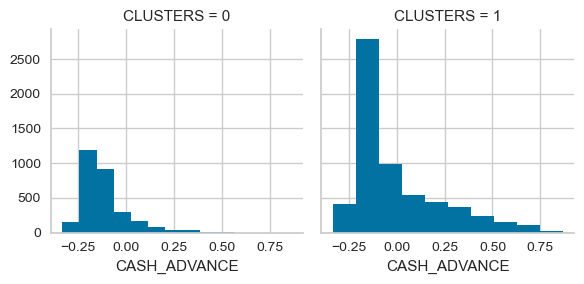

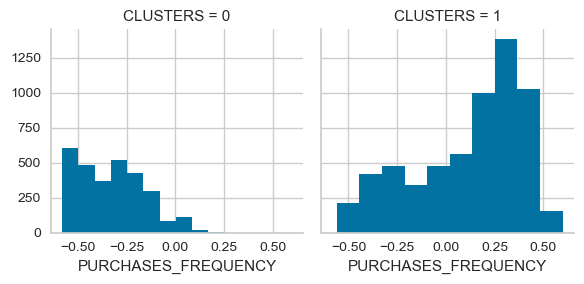

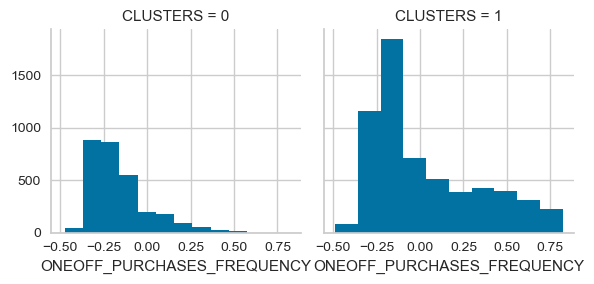

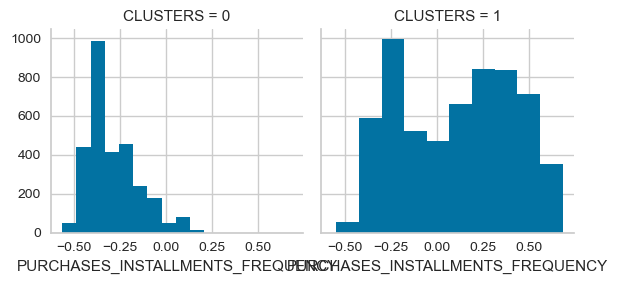

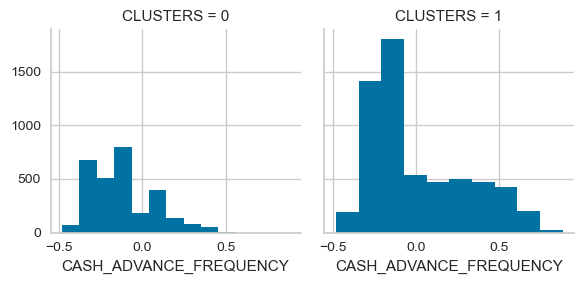

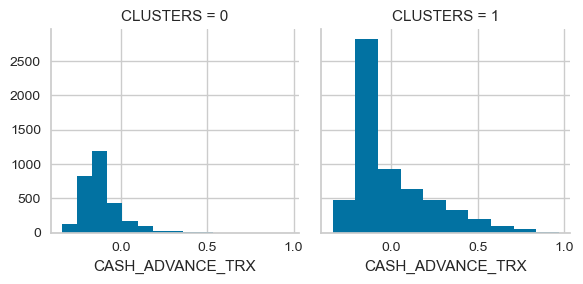

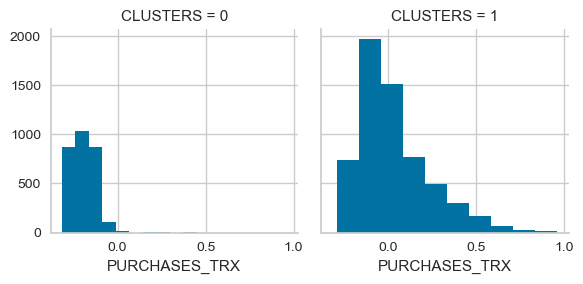

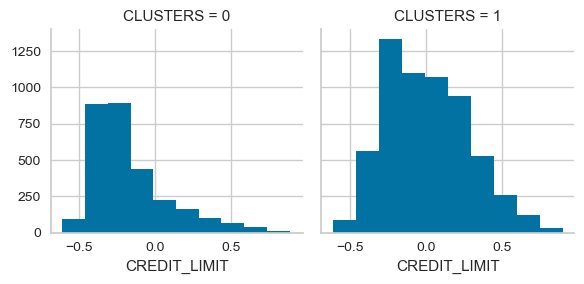

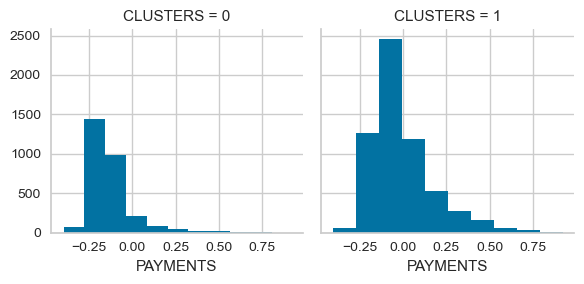

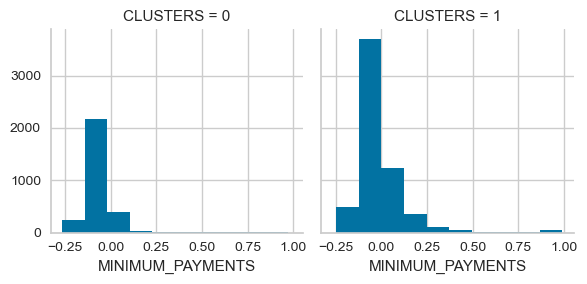

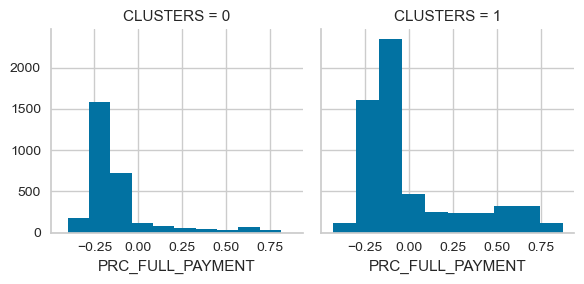

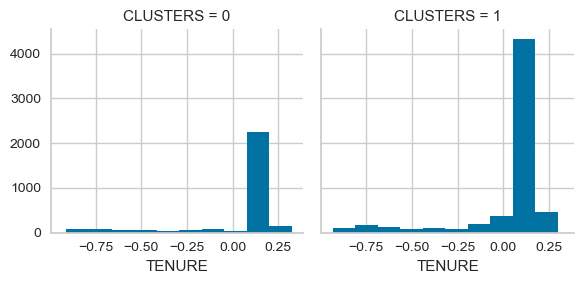

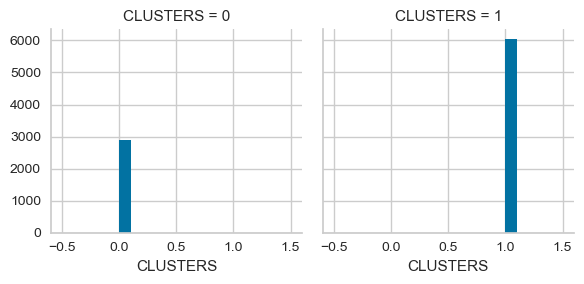

In [298]:
for c in hier_df:
    grid= sns.FacetGrid(hier_df, col='CLUSTERS')
    grid.map(plt.hist, c)

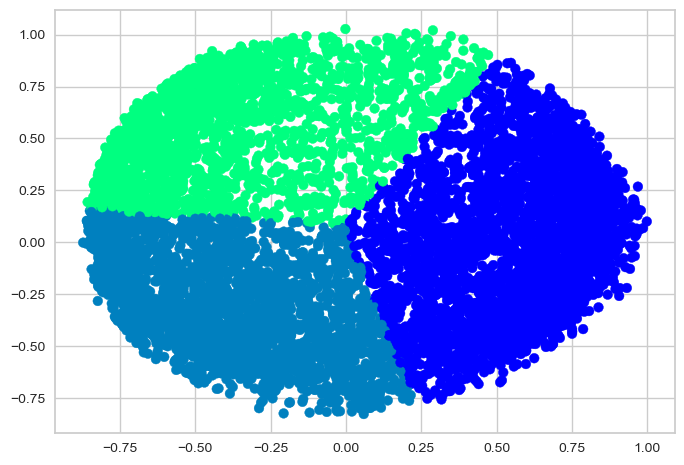

In [290]:
# Visualizing the clustering 
plt.scatter(X_principal['P1'], X_principal['P2'],  
           c = KMeans(n_clusters = 3).fit_predict(X_principal), cmap =plt.cm.winter) 
plt.show() 

In [291]:
# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .01     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = X_principal['P1'].min() - 1, X_principal['P1'].max() + 1
y_min, y_max = X_principal['P2'].min() - 1, X_principal['P2'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# Obtain labels for each point in mesh. Use last trained model.

# https://www.quora.com/Can-anybody-elaborate-the-use-of-c_-in-numpy
# https://www.geeksforgeeks.org/differences-flatten-ravel-numpy/
# Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

Z = kmeans.predict(np.array(list(zip(xx.ravel(), yy.ravel()))))

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
# https://stackoverflow.com/questions/16661790/difference-between-plt-close-and-plt-clf
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.winter,
           aspect='auto', origin='lower')

plt.plot(X_principal['P1'], X_principal['P2'], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='o', s=10, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the credit card fraud dataset (PCA-reduced data)\n'
          'Centroids are marked with white circle')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()

ValueError: X has 2 features, but KMeans is expecting 17 features as input.

In [ ]:
km = KMeans(n_clusters = 3,init ='k-means++', max_iter=300,random_state=35)
model1 = km.fit(df_clean)
y_pred = km.predict(df_clean)

In [ ]:
clus_df = pd.DataFrame(df_clean,columns = df_clean.columns)
clus_df['CLUSTERS'] = y_pred
clus_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTERS
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,2
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1
